## Modelos lineales

Los modelos lineales son una clase de modelos que se utilizan ampliamente en la práctica y se han estudiado ampliamente en las últimas décadas, con raíces que se remontan a más de cien años. Los modelos lineales hacen una predicción usando una función lineal de las características de entrada.

### Modelos lineales para regresión

Para regresión, la fórmula general de predicción para un modelo lineal, tiene la siguiente forma:

$$
\hat{y}= w[0]*x[0] + w[1]*x[1] + \dots +  w[p] *x[p] + b
$$

Aquí `x[0]` y `x[p]` denota las características de un único punto de datos, `w` y `b` son los parámetros del modelo que se aprenden, $\hat{y}$ es la predicción que el modelo hace.

Para más características, `w` contiene las pendientes a lo largo de cada eje de característica. Alternativamente, se puede pensar en la respuesta predicha como una suma ponderada de las características de entrada, con ponderaciones (que pueden ser negativas) dadas por las entradas de `w`.


In [1]:
%matplotlib inline
import numpy as np
def hacer_wave(n_muestras=100):
    rnd = np.random.RandomState(42)
    x = rnd.uniform(-3, 3, size=n_muestras)
    y_no_ruido = (np.sin(4 * x) + x)
    y = (y_no_ruido + rnd.normal(size=len(x))) / 2
    return x.reshape(-1, 1), y

In [2]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
cm2 = ListedColormap(['#0000aa', '#ff2020'])

def dibuja_regresion_lineal_wave():
    X, y = hacer_wave(n_muestras=60)
    X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y, random_state=42)

    linea = np.linspace(-3, 3, 100).reshape(-1, 1)

    lr_regresion = LinearRegression().fit(X_entrenamiento, y_entrenamiento)
    print("w[0]: %f  b: %f" % (lr_regresion.coef_[0], lr_regresion.intercept_))

    plt.figure(figsize=(8, 8))
    plt.plot(linea, lr_regresion.predict(linea))
    plt.plot(X, y, 'o', c=cm2(0))
    ax = plt.gca()
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.set_ylim(-3, 3)
    ax.legend(["modelo", "datos de entrenamiento"], loc="best")
    ax.grid(True)
    ax.set_aspect('equal')

w[0]: 0.393906  b: -0.031804


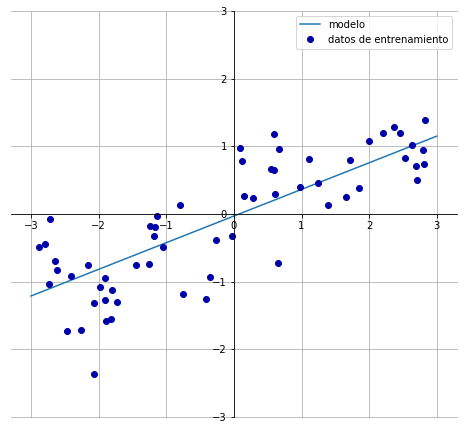

In [3]:
dibuja_regresion_lineal_wave()

Los modelos lineales de regresión se pueden caracterizar como modelos de regresión para los cuales la predicción es una línea para una característica única, un plano cuando se utilizan dos característica o un hiperplano en dimensiones superiores (es decir, cuando se usan más características).

Si se compara las predicciones hechas por la línea recta con las hechas por `KNeighborsRegressor`, usar una línea recta para hacer predicciones parece muy restrictivo. Parece que se pierden todos los detalles de los datos.

En cierto sentido, esto es cierto. Es una suposición fuerte (y algo poco realista) de que nuestro objetivo `y` es una combinación lineal de las características. Pero mirar datos unidimensionales da una perspectiva un tanto sesgada. Para conjuntos de datos con muchas características, los modelos lineales pueden ser muy potentes.

En particular, si tiene más características que puntos de datos de entrenamiento, cualquier objetivo `y` puede ser perfectamente modelado (en el conjunto de entrenamiento) como una función lineal.

Hay muchos modelos lineales diferentes para la regresión. La diferencia entre estos modelos radica en cómo los parámetros del modelo `w` y `b` se aprenden de los datos de entrenamiento y cómo se puede controlar la complejidad del modelo.

### Regresión lineal

La regresión lineal, o mínimos cuadrados ordinarios (OLS), es el método lineal más simple y  clásico para la regresión. La regresión lineal encuentra los parámetros `w` y `b` que minimizan el error cuadrático medio entre las predicciones y los verdaderos objetivos de regresión `y` en el conjunto de entrenamiento.

El error cuadrático medio es la suma de las diferencias al cuadrado entre las predicciones y los valores verdaderos. La regresión lineal no tiene parámetros, lo cual es un beneficio, pero tampoco se tiene forma de controlar la complejidad del modelo.

In [4]:
from sklearn.linear_model import LinearRegression
X, y = hacer_wave(n_muestras=60)
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y, random_state=42)
lr_regresion = LinearRegression().fit(X_entrenamiento, y_entrenamiento)

Los parámetros de "pendiente" `(w)`, también denominados pesos o coeficientes, que se almacenan en el atributo `coef_`, mientras que el desplazamiento o intersección `(b)` se almacena en el atributo `intercept_:`.

In [5]:
print("Coeficiente de regresion lineal: {}".format(lr_regresion.coef_))
print("Intercepto de regresion lineal : {}".format(lr_regresion.intercept_))

Coeficiente de regresion lineal: [0.39390555]
Intercepto de regresion lineal : -0.031804343026759746


El atributo `intercept_` es siempre un único número flotante, mientras que el atributo `coef_` es una matriz NumPy con una entrada por característica de entrada. Como solo tenemos una función de entrada única en el conjunto de datos `wave`, `lr_regresion.coef_` solo tiene una sola entrada.

In [6]:
print("Puntuacion del conjunto de entrenamiento: {:.2f}".format(lr_regresion.score(X_entrenamiento, y_entrenamiento)))
print("Puntuacion del conjunto de prueba: {:.2f}".format(lr_regresion.score(X_prueba, y_prueba)))

Puntuacion del conjunto de entrenamiento: 0.67
Puntuacion del conjunto de prueba: 0.66


Un $R^2$ de alrededor de 0,66 no es muy bueno, pero podemos ver que los puntajes en el entrenamiento y los conjuntos de prueba son muy similares. Esto significa que probablemente tengamos subajuste y no un sobreajuste.

Para este conjunto de datos unidimensional, existe poco peligro de sobreajuste, ya que el modelo es muy simple (o restringido). Sin embargo, con conjuntos de datos de mayor dimensión (es decir, conjuntos de datos con una gran cantidad de características), los modelos lineales se vuelven más potentes y existe una mayor posibilidad de sobreajuste.

Veamos cómo funciona LinearRegression en un conjunto de datos más complejo, como el conjunto de datos de `Boston Housing`. Recuerda que este conjunto de datos tiene 506 muestras y 105 característica derivadas.

Primero, cargamos el conjunto de datos y lo dividimos en un conjunto de entrenamiento y prueba. Luego construimos el modelo de regresión lineal como antes:

In [7]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
def cargar_boston_extendido():
    boston = load_boston()
    X = boston.data

    X = MinMaxScaler().fit_transform(boston.data)
    X = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)
    return X, boston.target

X, y = cargar_boston_extendido()
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y, random_state=0)
lr_regresion = LinearRegression().fit(X_entrenamiento, y_entrenamiento)

Al comparar el conjunto de entrenamiento y los puntajes del conjunto de prueba, encontramos que predecimos con mucha precisión en el conjunto de entrenamiento, pero el $R^2$ en el conjunto de prueba no es muy bueno:


In [8]:
print("Puntuacion del conjunto de entrenamiento: {:.2f}".format(lr_regresion.score(X_entrenamiento, y_entrenamiento)))
print("Puntuacion del conjunto de prueba: {:.2f}".format(lr_regresion.score(X_prueba, y_prueba)))

Puntuacion del conjunto de entrenamiento: 0.95
Puntuacion del conjunto de prueba: 0.61


Esta discrepancia entre el rendimiento en el conjunto de entrenamiento y el conjunto de pruebas es una clara señal de sobreajuste y, por lo tanto, debemos tratar de encontrar un modelo que nos permita controlar la complejidad. Una de las alternativas más comúnmente utilizadas para la regresión lineal estándar es la regresión ridge.

### Regresión ridge

La regresión de Ridge también es un modelo lineal para la regresión, por lo que la fórmula que usa para hacer predicciones es la misma que se usa para los mínimos cuadrados ordinarios. Sin embargo, en la regresión ridge, los coeficientes (w) se eligen no solo para que puedan predecir bien los datos de entrenamiento, sino también para ajustarse a una restricción adicional.

También queremos que la magnitud de los coeficientes sea lo más pequeña posible; en otras palabras, todas las entradas de `w` deberían estar cerca de cero. Intuitivamente, esto significa que cada característica debería tener tan poco efecto en el resultado como sea posible (lo que se traduce en tener una pendiente pequeña), mientras se sigue prediciendo bien. 

Esta restricción es un ejemplo de lo que se llama regularización.

Regularización significa restringir explícitamente un modelo para evitar el sobreajuste. El tipo particular utilizado por la regresión ridge se conoce como regularización L2.

In [9]:
from sklearn.linear_model import Ridge
ridge_regresion = Ridge().fit(X_entrenamiento, y_entrenamiento)
print("Puntuacion del conjunto de entrenamiento: {:.2f}".format(ridge_regresion.score(X_entrenamiento, y_entrenamiento)))
print("Puntuacion del conjunto de pruebas: {:.2f}".format(ridge_regresion.score(X_prueba, y_prueba)))

Puntuacion del conjunto de entrenamiento: 0.89
Puntuacion del conjunto de pruebas: 0.75


Como se  puede ver, el puntaje del conjunto de entrenamiento de Ridge es menor que el de LinearRegression, mientras que el puntaje del conjunto de prueba es más alto. Esto es consistente con nuestras expectativas. 

Con la regresión lineal, estábamos sobreajustando nuestros datos. Ridge es un modelo más restringido, por lo que es menos probable que realicemos sobreajuste. Un modelo menos complejo significa peor rendimiento en el conjunto de entrenamiento, pero con una mejor generalización. 

Como solo estamos interesados en el rendimiento general, debemos elegir el modelo Ridge sobre el modelo LinearRegression.

El modelo Ridge hace una compensación entre la simplicidad del modelo (coeficientes cercanos a cero) y su rendimiento en el conjunto de entrenamiento. La cantidad de importancia que el modelo otorga a la simplicidad frente al rendimiento del conjunto de entrenamiento puede ser especificada por el usuario, utilizando el parámetro alfa. En el ejemplo anterior, usamos el parámetro predeterminado alpha = 1.0. Sin embargo, no hay ninguna razón para que esto nos brinde la mejor compensación.

La configuración óptima de alpha depende del conjunto de datos particular que estamos usando. El aumento de alpha fuerza a los coeficiente a  moverse más hacia cero, lo que disminuye el rendimiento del conjunto de entrenamiento pero puede ayudar a la generalización.

In [10]:
ridge10 = Ridge(alpha=10).fit(X_entrenamiento, y_entrenamiento)
print("Puntuacion del conjunto de entrenamiento: {:.2f}".format(ridge10.score(X_entrenamiento, y_entrenamiento)))
print("Puntuacion del conjunto de pruebas: {:.2f}".format(ridge10.score(X_prueba, y_prueba)))

Puntuacion del conjunto de entrenamiento: 0.79
Puntuacion del conjunto de pruebas: 0.64


La disminución de `alpha` permite que los coeficientes sean menos restringidos. Para valores muy pequeños de `alpha`, los coeficientes apenas se restringen en absoluto  y terminamos con un modelo que se asemeja a `LinearRegression`.

In [11]:
ridge01 = Ridge(alpha=0.1).fit(X_entrenamiento, y_entrenamiento)
print("Puntuacion del conjunto de entrenamiento: {:.2f}".format(ridge01.score(X_entrenamiento, y_entrenamiento)))
print("Puntuacion del conjunto de pruebas: {:.2f}".format(ridge01.score(X_prueba, y_prueba)))

Puntuacion del conjunto de entrenamiento: 0.93
Puntuacion del conjunto de pruebas: 0.77


También podemos obtener una visión más cualitativa de cómo el parámetro `alpha` cambia el modelo al inspeccionar el atributo `coef_` de los modelos con diferentes valores `alpha`. Un `alpha` superior significa un modelo más restringido, por lo que esperamos que las entradas de `coef_` tengan una magnitud menor para un valor alto de `alpha` que para un valor bajo de `alpha`.

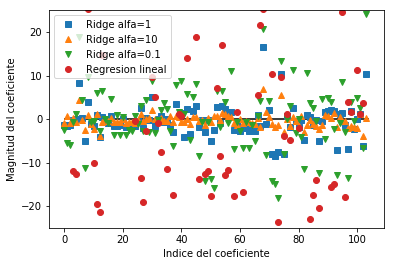

In [12]:
plt.plot(ridge_regresion.coef_, 's', label="Ridge alfa=1")
plt.plot(ridge10.coef_, '^', label="Ridge alfa=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alfa=0.1")
plt.plot(lr_regresion.coef_, 'o', label="Regresion lineal")
plt.xlabel("Indice del coeficiente")
plt.ylabel("Magnitud del coeficiente")
plt.hlines(0, 0, len(lr_regresion.coef_))
plt.ylim(-25, 25)
plt.legend()

Aquí, el eje x enumera las entradas de `coef_`: 

`x = 0` muestra el coeficiente asociado con la primera característica, `x = 1` el coeficiente asociado con la segunda característica, y así sucesivamente hasta `x = 100`. 

El eje y muestra los valores numéricos de los valores correspondientes de los coeficientes. El punto principal aquí es que para `alpha = 10`, los coeficientes son en su mayoría entre -3 y 3. Los coeficientes para el modelo de Ridge con `alpha = 1` son algo mayores.

Los puntos correspondientes a `alpha = 0.1` tienen todavía una magnitud mayor y muchos de los puntos correspondientes a la regresión lineal sin regularización (que serían `alpha = 0`) son tan grandes que están fuera del gráfico.

Otra forma de entender la influencia de la regularización es fijar un valor de `alpha`, pero variar la cantidad de datos de entrenamiento disponibles. Submuestreamos el conjunto de datos de `Boston Housing` y evaluamos LinearRegression y Ridge (`alpha = 1`) en subconjuntos de tamaño creciente (los gráficos que muestran el rendimiento del modelo en función del tamaño del conjunto de datos se denominan curvas de aprendizaje).

In [13]:
from sklearn.model_selection import learning_curve,  KFold
def dibuja_curva_aprendizaje(est, X, y):
    tam_conjunto_entrenamiento, puntuacion_entrenamiento, puntuacion_prueba = learning_curve(
        est, X, y, train_sizes=np.linspace(.1, 1, 20), cv=KFold(20, shuffle=True, random_state=1))
    nombre_estimador = est.__class__.__name__
    linea = plt.plot(tam_conjunto_entrenamiento, puntuacion_entrenamiento.mean(axis=1), '--',
                    label="entrenamiento " + nombre_estimador)
    plt.plot(tam_conjunto_entrenamiento, puntuacion_prueba.mean(axis=1), '-',
             label="prueba " + nombre_estimador, c=linea[0].get_color())
    plt.xlabel('Tam del conjunto de entrenamiento')
    plt.ylabel('Puntuacion (R^2)')
    plt.ylim(0, 1.1)

In [14]:
def dibuja_ridge_n_muestras():
    X, y = cargar_boston_extendido()

    dibuja_curva_aprendizaje(Ridge(alpha=1), X, y)
    dibuja_curva_aprendizaje(LinearRegression(), X, y)
    plt.legend(loc=(0, 1.05), ncol=2, fontsize=11)

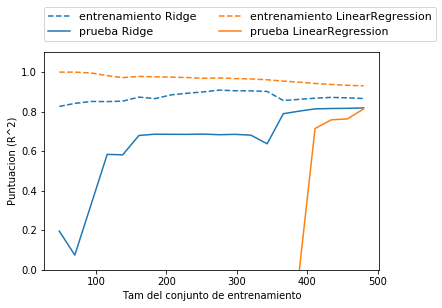

In [15]:
dibuja_ridge_n_muestras()

Como era de esperar, el puntaje del entrenamiento es más alto que el puntaje de prueba para todos los tamaños del conjuntos de datos, tanto para ridge como para la regresión lineal. Debido a que el ridge está regularizado, el puntaje de entrenamiento ridge es más bajo que el puntaje de entrenamiento para la regresión lineal en general.

Sin embargo, el puntaje de la prueba para ridge es mejor, particularmente para subconjuntos pequeños de los datos. Para menos de 400 puntos de datos, la regresión lineal no puede aprender nada. A medida que más y más datos están disponibles para el modelo, ambos modelos mejoran, y la regresión lineal alcanza a ridge en el final .

La lección aquí es que con suficientes datos de entrenamiento, la regularización se vuelve menos importante y dado los datos suficientes, ridge y la regresión lineal tendrán el mismo rendimiento (el hecho de que esto ocurra aquí cuando se usa el conjunto de datos completo es casual).

Otro aspecto interesante de la figura anterior es la disminución en el rendimiento del entrenamiento para la regresión lineal. Si se agregan más datos, es más difícil que un modelo se sobreajuste o memorice los datos.

### Lasso

Una alternativa a Ridge para regularizar la regresión lineal es Lasso. Al igual que con la regresión ridge, el uso del lasso también restringe los coeficientes a estar cerca de cero, pero de una manera ligeramente diferente, llamada regularización L1.

La consecuencia de la regularización L1 es que al usar lasso, algunos coeficientes son exactamente cero. Esto significa que algunas características son completamente ignoradas por el modelo. Esto se puede ver como una forma de selección automática de características. Tener algunos coeficientes exactamente iguales a cero hace que un modelo sea más fácil de interpretar y puede revelar las características más importantes del  modelo.

In [16]:
from sklearn.linear_model import Lasso
lasso_regresion = Lasso().fit(X_entrenamiento, y_entrenamiento)
print("Puntuacion conjunto de entrenamiento: {:.2f}".format(lasso_regresion.score(X_entrenamiento, y_entrenamiento)))
print("Puntuacion conjunto de datos: {:.2f}".format(lasso_regresion.score(X_prueba, y_prueba)))
print("Numero de caracteristicas usadas: {}".format(np.sum(lasso_regresion.coef_ != 0)))

Puntuacion conjunto de entrenamiento: 0.29
Puntuacion conjunto de datos: 0.21
Numero de caracteristicas usadas: 4


Como se  puede ver, Lasso lo hace bastante mal, tanto en el entrenamiento como en el conjunto de pruebas. Esto indica que no tenemos el equipamiento adecuado  y encontramos que usó solo 4 de las 105 características.

De forma similar a Ridge, Lasso también tiene un parámetro de regularización, `alpha`, que controla como  los coeficientes van hacia cero. En el ejemplo anterior, usamos el valor por defecto de `alpha = 1.0`.  Para reducir el subajuste, intentemos disminuir `alpha`.

Cuando hacemos esto, también necesitamos aumentar la configuración predeterminada de `max_iter` (la cantidad máxima de iteraciones para ejecutar):

In [17]:
# Incrementamos el valor por defecto de max_iter
# de lo contrario, el modelo nos advertiría que debemos aumentar max_iter

lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_entrenamiento, y_entrenamiento)
print("Puntuacion conjunto de entrenamiento: {:.2f}".format(lasso001.score(X_entrenamiento, y_entrenamiento)))
print("Puntuacion conjunto de datos: {:.2f}".format(lasso001.score(X_prueba, y_prueba)))
print("Numero de caracteristicas usadas: {}".format(np.sum(lasso001.coef_ != 0)))

Puntuacion conjunto de entrenamiento: 0.90
Puntuacion conjunto de datos: 0.77
Numero de caracteristicas usadas: 33


Si establecemos `alpha` con un valor demasiado bajo, sin embargo, eliminamos nuevamente el efecto de regularización y terminamos sobreajustados, con un resultado similar a LinearRegression:

In [18]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_entrenamiento, y_entrenamiento)
print("Puntuacion conjunto de entrenamiento: {:.2f}".format(lasso00001.score(X_entrenamiento, y_entrenamiento)))
print("Puntuacion conjunto de datos: {:.2f}".format(lasso00001.score(X_prueba, y_prueba)))
print("Numero de caracteristicas usadas: {}".format(np.sum(lasso00001.coef_ != 0)))

Puntuacion conjunto de entrenamiento: 0.95
Puntuacion conjunto de datos: 0.64
Numero de caracteristicas usadas: 94


Text(0,0.5,'Magnitud del coeficiente')

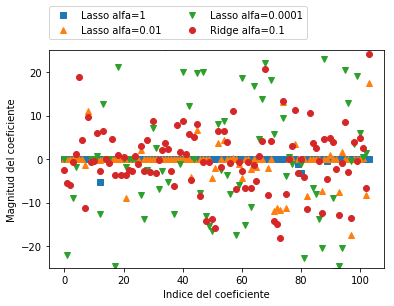

In [19]:
plt.plot(lasso_regresion.coef_, 's', label="Lasso alfa=1")
plt.plot(lasso001.coef_, '^', label="Lasso alfa=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alfa=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alfa=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Indice del coeficiente")
plt.ylabel("Magnitud del coeficiente")

Para `alpha = 1`, no solo vemos que la mayoría de los coeficientes son cero (lo que ya sabíamos), sino que los coeficientes restantes también son pequeños en magnitud. Al disminuir `alpha` a 0.01, obtenemos la solución que se muestra como los puntos naranjas, lo que hace que la mayoría de las características sean exactamente cero.

Usando `alpha = 0.00001`, obtenemos un modelo que no está regularizado, con la mayoría de los coeficientes distintos de cero y de gran magnitud. A modo de comparación, la mejor solución Ridge se muestra en rojo. El modelo Ridge con `alpha = 0.1` tiene un rendimiento predictivo similar al del modelo Lasso con `alpha= 0.01`, pero al usar Ridge, todos los coeficientes son distintos de cero.

En la práctica, la regresión Ridge suele ser la primera opción entre estos dos modelos. Sin embargo, si tiene una gran cantidad de características y espera que solo unas pocas sean importantes, Lasso podría ser una mejor opción.

De manera similar, si desea tener un modelo que sea fácil de interpretar, Lasso proporcionará un modelo que es más fácil de entender, ya que seleccionará solo un subconjunto de las características de entrada. scikit-learn también proporciona la clase `ElasticNet`, que combina las penalizaciones de Lasso y Ridge. 

En la práctica, esta combinación funciona mejor, aunque al precio a pagar es  tener que ajustar dos parámetros: uno para la regularización L1 y otro para la regularización L2.